In [38]:
import pandas as pd
import numpy as np

# Зчитуємо потрібні змінні з датасету
# Read the required variables from the dataset
df = pd.read_csv('amazon.csv', usecols=['rating', 'actual_price', 'discount_percentage', 'product_link'])
print(df)

# Приводимо дані до потрібного вигляду
# Format the data into the desired form
rating =  df['rating'].apply(pd.to_numeric, errors='coerce')

discount_percentage = df['discount_percentage']
for i in range(len(discount_percentage)):
    # Видаляємо символ '%' з кінця
    # Delete '%' character from the end
    discount_percentage[i] = discount_percentage[i].strip('%')
# Форматуємо в числовий тип
# Format into a numeric type
discount_percentage = discount_percentage.apply(pd.to_numeric, errors='coerce')     

actual_price = df['actual_price']
for i in range(len(actual_price)):
    actual_price[i] = actual_price[i].replace(',', '').strip('₹')
actual_price = actual_price.apply(pd.to_numeric, errors='coerce')


# Видаляємо нечислові значення (помилки зчитування)
# Remove NaN values (reading errors)
actual_price = actual_price.drop(index=1279)
discount_percentage = discount_percentage.drop(index=1279)
rating = rating.drop(index=1279)   


     actual_price discount_percentage rating  \
0          ₹1,099                 64%    4.2   
1            ₹349                 43%    4.0   
2          ₹1,899                 90%    3.9   
3            ₹699                 53%    4.2   
4            ₹399                 61%    4.2   
...           ...                 ...    ...   
1460         ₹919                 59%      4   
1461       ₹3,045                 25%    4.1   
1462       ₹3,080                 28%    3.6   
1463       ₹1,890                 26%      4   
1464       ₹3,690                 22%    4.3   

                                           product_link  
0     https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1     https://www.amazon.in/Ambrane-Unbreakable-Char...  
2     https://www.amazon.in/Sounce-iPhone-Charging-C...  
3     https://www.amazon.in/Deuce-300-Resistant-Tang...  
4     https://www.amazon.in/Portronics-Konnect-POR-1...  
...                                                 ...  
1460  https://www

In [39]:
print(rating)
print(discount_percentage)
print(actual_price)

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460    4.0
1461    4.1
1462    3.6
1463    4.0
1464    4.3
Name: rating, Length: 1464, dtype: float64
0       64
1       43
2       90
3       53
4       61
        ..
1460    59
1461    25
1462    28
1463    26
1464    22
Name: discount_percentage, Length: 1464, dtype: int64
0       1099.0
1        349.0
2       1899.0
3        699.0
4        399.0
         ...  
1460     919.0
1461    3045.0
1462    3080.0
1463    1890.0
1464    3690.0
Name: actual_price, Length: 1464, dtype: float64


In [40]:
print(actual_price.count())
print(rating.count())
print(discount_percentage.count())

1464
1464
1464


In [41]:
from scipy.stats import shapiro

stat, p = shapiro(actual_price)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.483, p=0.000


In [42]:
stat, p = shapiro(rating)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.925, p=0.000


In [43]:
stat, p = shapiro(discount_percentage)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.981, p=0.000


In [44]:
import pandas as pd

df = pd.DataFrame({'Actual Price': actual_price, 'Rating' : rating, 'Discount Percentage' : discount_percentage})

corr_matrix = df.corr(method='spearman')

print(corr_matrix)

                     Actual Price    Rating  Discount Percentage
Actual Price             1.000000  0.033441            -0.066040
Rating                   0.033441  1.000000            -0.145954
Discount Percentage     -0.066040 -0.145954             1.000000


In [45]:
import scipy.stats as stats

In [46]:
_, pval = stats.spearmanr(actual_price, rating)
print("p_value: ", pval)

p_value:  0.20096934858153945


In [47]:
_, pval = stats.spearmanr(actual_price, discount_percentage)
print("p_value: ", pval)

p_value:  0.011490172669125045


In [48]:
_, pval = stats.spearmanr(discount_percentage, rating)
print("p_value: ", pval)

p_value:  2.0252782263192194e-08


In [49]:
import pandas as pd

df = pd.DataFrame({'Actual Price': actual_price, 'Rating' : rating, 'Discount Percentage' : discount_percentage})

corr_matrix = df.corr(method='kendall')

print(corr_matrix)

                     Actual Price    Rating  Discount Percentage
Actual Price             1.000000  0.026142            -0.047148
Rating                   0.026142  1.000000            -0.103038
Discount Percentage     -0.047148 -0.103038             1.000000


In [50]:
_, pval = stats.kendalltau(actual_price, rating)
print("p_value", pval)

p_value 0.15804364216563882


In [51]:
_, pval = stats.kendalltau(actual_price, discount_percentage)
print("p_value", pval)

p_value 0.00776144972346207


In [52]:
_, pval = stats.kendalltau(discount_percentage, rating)
print("p_value", pval)

p_value 2.6585352293548356e-08


Text(0.5, 0, 'rating')

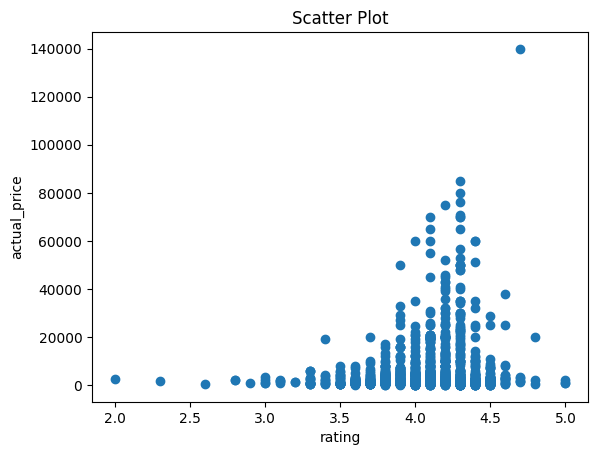

In [53]:
import matplotlib.pyplot as plt

plt.scatter(rating, actual_price)
plt.title("Scatter Plot")
plt.ylabel("actual_price")
plt.xlabel("rating")

Text(0.5, 0, 'discount_percentage')

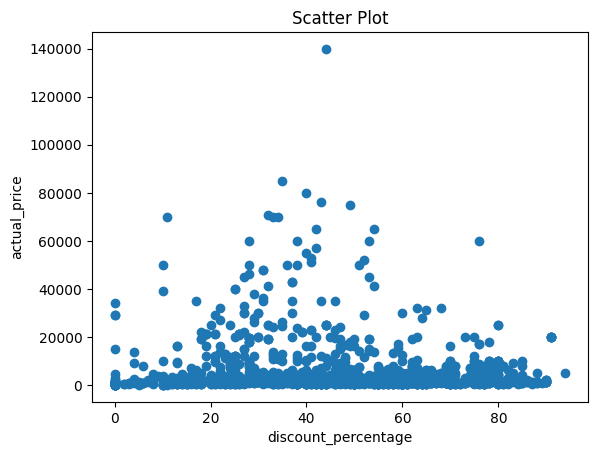

In [54]:
plt.scatter(discount_percentage, actual_price)
plt.title("Scatter Plot")
plt.ylabel("actual_price")
plt.xlabel("discount_percentage")

Text(0.5, 0, 'discount_percentage')

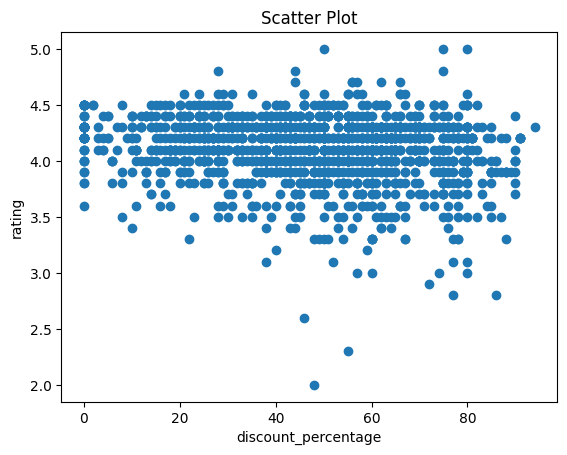

In [55]:
plt.scatter(discount_percentage, rating)
plt.title("Scatter Plot")
plt.ylabel("rating")
plt.xlabel("discount_percentage")

In [56]:
import statsmodels.formula.api as smf

# Repackage the dataframe into a pandas dataframe
df = pd.DataFrame({'actual_price': actual_price, 'rating': rating, 'discount_percentage': discount_percentage})

formula = 'actual_price' + '~ rating + discount_percentage'

# Generate linear regression model using Least Squares method
model = smf.ols(formula=formula, data=df).fit()

In [57]:
# get the coefficients of the regression function
coef = model.params

# extract independent variables
X = df[['rating', 'discount_percentage']]

# calculate predicted values
y_pred = np.dot(X, coef[1:]) + coef[0]

# calculate sum of squared residuals
ss_res = np.sum((df['actual_price'] - y_pred)**2)

# calculate total sum of squares
ss_tot = np.sum((df['actual_price'] - np.mean(df['actual_price']))**2)

# independed variables number (predictors number)
p = 2

# dataframe size 
n = df.__len__()

# calculate R-squared
r_squared = 1 - (ss_res / (n - p)) / (ss_tot / (n - 1))

print("R-squared:", r_squared)

R-squared: 0.024286872718635943


In [58]:
from scipy.stats import f

# F-statistic in a linear regression analysis
F = r_squared / (1 - r_squared) * (n - p) / (p - 1)

p_value = f.sf(F, p - 1, n - p)

print("P-value:", p_value)

P-value: 2.041748440154469e-09


In [59]:
import statsmodels.api as sm

# Create the design matrix
X = df[['rating', 'discount_percentage']]
X = sm.add_constant(X)

# Create the response vector
y = df['actual_price']

# Create the robust regression model
rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT())

# Fit the model
rlm_results = rlm_model.fit()

In [60]:
# get the coefficients of the regression function
coef = rlm_results.params

# extract independent variables
X = df[['rating', 'discount_percentage']]

# calculate predicted values
y_pred = np.dot(X, coef[1:]) + coef[0]

# calculate sum of squared residuals
ss_res = np.sum((df['actual_price'] - y_pred)**2)

# calculate total sum of squares
ss_tot = np.sum((df['actual_price'] - np.mean(df['actual_price']))**2)

# independed variables number (predictors number)
p = 2

# dataframe size 
n = df.__len__()

# calculate R-squared
r_squared = 1 - (ss_res / (n - p)) / (ss_tot / (n - 1))

print("R-squared:", r_squared)

R-squared: -0.06962714401299563


In [61]:
from scipy.stats import f

F = r_squared / (1 - r_squared) * (n - p) / (p - 1)

p_value = f.sf(F, p - 1, n - p)

print("P-value:", p_value)

P-value: 1.0


In [62]:
from sklearn.preprocessing import StandardScaler

pactual_price = actual_price.values.reshape(-1, 1)
prating = rating.values.reshape(-1, 1)
pdiscount = discount_percentage.values.reshape(-1, 1)

scaler = StandardScaler()

normalized_actual_price = scaler.fit_transform(pactual_price).flatten()
normalized_rating = scaler.fit_transform(prating).flatten()
normalized_discount_percentage = scaler.fit_transform(pdiscount).flatten()

In [63]:
df1 = pd.DataFrame({'normalized_actual_price': normalized_actual_price, 'normalized_rating': normalized_rating, 'normalized_discount_percentage': normalized_discount_percentage})

formula = 'normalized_actual_price' + '~ normalized_rating + normalized_discount_percentage'
model = smf.ols(formula=formula, data=df1).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     normalized_actual_price   R-squared:                       0.025
Model:                                 OLS   Adj. R-squared:                  0.024
Method:                      Least Squares   F-statistic:                     18.70
Date:                     Tue, 16 May 2023   Prob (F-statistic):           9.61e-09
Time:                             00:55:18   Log-Likelihood:                -2058.8
No. Observations:                     1464   AIC:                             4124.
Df Residuals:                         1461   BIC:                             4140.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [64]:
coef = model.params

# extract independent variables
X = df1[['normalized_rating', 'normalized_discount_percentage']]

# calculate predicted values
y_pred = np.dot(X, coef[1:]) + coef[0]

# calculate sum of squared residuals
ss_res = np.sum((df1['normalized_actual_price'] - y_pred)**2)

# calculate total sum of squares
ss_tot = np.sum((df1['normalized_actual_price'] - np.mean(df1['normalized_actual_price']))**2)

# independed variables number (predictors number)
p = 2

# dataframe size 
n = df.__len__()

# calculate R-squared
r_squared = 1 - (ss_res / (n - p)) / (ss_tot / (n - 1))

print("R-squared:", r_squared)

R-squared: 0.024286872718636165


In [65]:
F = r_squared / (1 - r_squared) * (n - p) / (p - 1)

p_value = f.sf(F, p - 1, n - p)

print("P-value:", p_value)

P-value: 2.0417484401539395e-09


In [66]:
formula = 'rating' + '~ actual_price + discount_percentage'

# Generate linear regression model using Least Squares method   
model = smf.ols(formula=formula, data=df).fit()

In [67]:
# get the coefficients of the regression function
coef = model.params

# extract independent variables
X = df[['actual_price', 'discount_percentage']]

# calculate predicted values
y_pred = np.dot(X, coef[1:]) + coef[0]

# calculate sum of squared residuals
ss_res = np.sum((df['rating'] - y_pred)**2)

# calculate total sum of squares
ss_tot = np.sum((df['rating'] - np.mean(df['rating']))**2)

# independed variables number (predictors number)
p = 2

# dataframe size 
n = df.__len__()

# calculate R-squared
r_squared = 1 - (ss_res / (n - p)) / (ss_tot / (n - 1))

print("R-squared:", r_squared)

R-squared: 0.0342908163613741


In [68]:
F = r_squared / (1 - r_squared) * (n - p) / (p - 1)

p_value = f.sf(F, p - 1, n - p)

print("P-value:", p_value)

P-value: 9.25777644420574e-13


In [69]:
formula = 'discount_percentage' + '~ actual_price + rating'

# Generate linear regression model using Least Squares method   
model = smf.ols(formula=formula, data=df).fit()

In [70]:
# get the coefficients of the regression function
coef = model.params

# extract independent variables
X = df[['actual_price', 'rating']]

# calculate predicted values
y_pred = np.dot(X, coef[1:]) + coef[0]

# calculate sum of squared residuals
ss_res = np.sum((df['discount_percentage'] - y_pred)**2)

# calculate total sum of squares
ss_tot = np.sum((df['discount_percentage'] - np.mean(df['discount_percentage']))**2)

# independed variables number (predictors number)
p = 2

# dataframe size 
n = df.__len__()

# calculate R-squared
r_squared = 1 - (ss_res / (n - p)) / (ss_tot / (n - 1))

print("R-squared:", r_squared)

R-squared: 0.0335416867635856


In [71]:
F = r_squared / (1 - r_squared) * (n - p) / (p - 1)

p_value = f.sf(F, p - 1, n - p)

print("P-value:", p_value)

P-value: 1.6493065703164507e-12


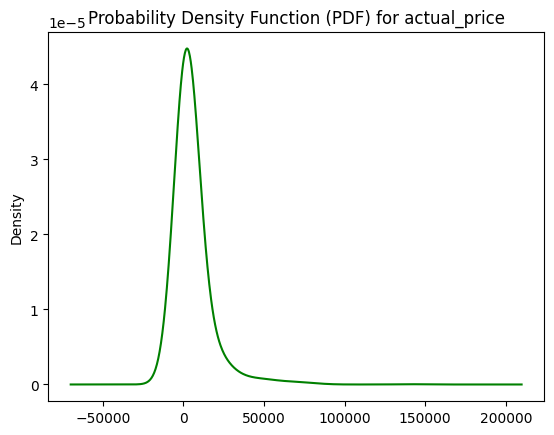

In [72]:
actual_price.plot(kind = 'density', color='green', bw_method=0.7)
plt.title('Probability Density Function (PDF) for actual_price')
plt.show()

In [73]:
print(normalized_actual_price.mean())
print(normalized_actual_price.std())

-1.9413735949729513e-17
1.0


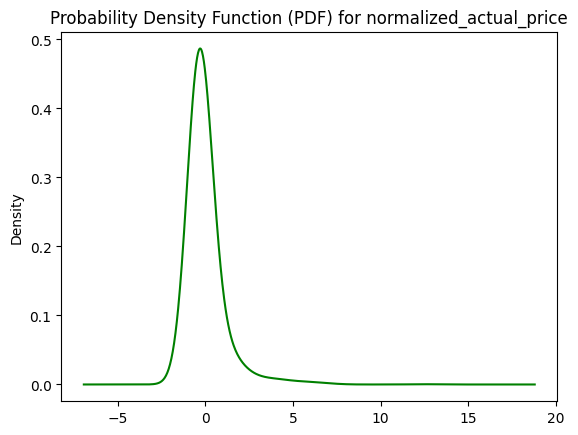

In [74]:
normalized_actual_price = pd.Series(normalized_actual_price.flatten())
normalized_actual_price.plot(kind = 'density', color='green', bw_method=0.7)
plt.title('Probability Density Function (PDF) for normalized_actual_price')
plt.show()